# Question 1

Categorical:
1. GENDER
2. EDUCATION
3. MARITAL
4. RATING
5. S(n)

Numeric:
1. LIMIT
2. BALANCE
3. INCOME
4. AGE
5. B(n)
6. R(n)

In [1]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn import preprocessing
from matplotlib import pyplot as plt
import seaborn as sns
from sklearn.metrics import mean_squared_error, r2_score


In [2]:
df = pd.read_csv('ECA_data.csv')
df

,ID,LIMIT,BALANCE,INCOME,RATING,GENDER,EDUCATION,MARITAL,AGE,S1,...,B1,B2,B3,B4,B5,R1,R2,R3,R4,R5
0,1,210000,0.000,235822,1,1,1.0,2.0,30,0,...,0,0,0,0,0,0,0,0,0,0
1,2,260000,10928.050,278481,0,0,2.0,2.0,31,0,...,54074,46407,38874,31324,24031,2000,2000,2000,2000,72000
2,3,400000,65397.850,431993,0,0,3.0,1.0,51,0,...,343591,352484,338823,283288,185288,15000,14000,11500,8000,7000
3,4,20000,3695.300,22368,0,0,2.0,1.0,58,-1,...,21470,200,0,28740,1295,0,0,28740,1565,0
4,5,180000,68.250,166900,0,1,2.0,1.0,42,0,...,1260,598,2056,4300,1802,598,2056,4300,1802,3691
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18764,18762,220000,33065.900,225862,0,0,3.0,1.0,39,0,...,192815,208365,88004,31237,15980,20000,5003,3047,5000,1000
18765,18763,150000,294.525,149966,0,0,3.0,2.0,43,-1,...,1828,3502,8979,5190,0,3526,8998,129,0,0
18766,18764,30000,623.875,30327,1,0,2.0,2.0,37,3,...,3356,2758,20878,20582,19357,0,22000,4200,2000,3100
18767,18765,80000,0.000,94607,1,0,3.0,1.0,41,-1,...,78379,76304,52774,11855,48944,3409,1178,1926,52964,1804


# Question 2

In [3]:
# Data Pre-processing (1) Replacing NAN values
# We are able to see the NAN values in edu and martial therefore it's in our interest 
# to fill the NA data with relevant data, we chose 0 because in the data dictionary 
# it stated that 0 is for the Others type, which is what we will be using. 
print(df.isnull().sum())

updated_df = df
updated_df['EDUCATION']=updated_df['EDUCATION'].fillna(updated_df['EDUCATION'].mode()[0]) 
updated_df['MARITAL']=updated_df['MARITAL'].fillna(0) # df.fillna(0)
updated_df.info()

ID            0
LIMIT         0
BALANCE       0
INCOME        0
RATING        0
GENDER        0
EDUCATION    13
MARITAL      38
AGE           0
S1            0
S2            0
S3            0
S4            0
S5            0
B1            0
B2            0
B3            0
B4            0
B5            0
R1            0
R2            0
R3            0
R4            0
R5            0
dtype: int64
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18769 entries, 0 to 18768
Data columns (total 24 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   ID         18769 non-null  int64  
 1   LIMIT      18769 non-null  int64  
 2   BALANCE    18769 non-null  float64
 3   INCOME     18769 non-null  int64  
 4   RATING     18769 non-null  int64  
 5   GENDER     18769 non-null  int64  
 6   EDUCATION  18769 non-null  float64
 7   MARITAL    18769 non-null  float64
 8   AGE        18769 non-null  int64  
 9   S1         18769 non-null  int64  
 10  S2       

In [4]:
# Date Pre-processing (2) Removing inaccurate data

# There are inaccurate data (outliers) inputs in certain columns and 
# therefore it is necessary to remove those.

min_age = updated_df['AGE'].min()
max_age = updated_df['AGE'].max()

print(updated_df.loc[df['AGE'] == min_age])
print(updated_df.loc[df['AGE'] == max_age])

# Drop rows with AGE = -1
updated_df.drop([664], inplace=True)
updated_df.drop([4242], inplace=True)
updated_df.drop([15358], inplace=True)
updated_df.drop([18165], inplace=True)
updated_df.drop([18166], inplace=True)

# Drop rows with AGE = 199
updated_df.drop([535], inplace=True)
updated_df.drop([1617], inplace=True)
updated_df.drop([7833], inplace=True)
updated_df.drop([18082], inplace=True)
updated_df.drop([18282], inplace=True)

          ID   LIMIT    BALANCE  INCOME  RATING  GENDER  EDUCATION  MARITAL  \
664      662   20000   1238.125   10000       0       0        1.0      2.0   
4242    4240  360000   2234.400  415985       0       0        1.0      1.0   
15358  15356  250000    105.525  255854       0       1        2.0      2.0   
18165  18163  240000  39785.550  230383       0       0        1.0      2.0   
18166  18164   70000    811.650   68051       0       0        1.0      2.0   

       AGE  S1  ...      B1      B2      B3     B4     B5     R1     R2    R3  \
664     -1   0  ...    7860       0       0      0      0      0      0     0   
4242    -1   0  ...       0       0       0      0      0      0      0     0   
15358   -1   0  ...    1867    2470    3887   4731   8710   2661   3887  1000   
18165   -1   0  ...  231891  240146  245552  91382  93177  12000  10373  3403   
18166   -1  -1  ...     323       0       0      0      0      0      0     0   

         R4    R5  
664       0     0 

In [5]:
# Check if the rows with inaccurate data have been dropped
updated_df

,ID,LIMIT,BALANCE,INCOME,RATING,GENDER,EDUCATION,MARITAL,AGE,S1,...,B1,B2,B3,B4,B5,R1,R2,R3,R4,R5
0,1,210000,0.000,235822,1,1,1.0,2.0,30,0,...,0,0,0,0,0,0,0,0,0,0
1,2,260000,10928.050,278481,0,0,2.0,2.0,31,0,...,54074,46407,38874,31324,24031,2000,2000,2000,2000,72000
2,3,400000,65397.850,431993,0,0,3.0,1.0,51,0,...,343591,352484,338823,283288,185288,15000,14000,11500,8000,7000
3,4,20000,3695.300,22368,0,0,2.0,1.0,58,-1,...,21470,200,0,28740,1295,0,0,28740,1565,0
4,5,180000,68.250,166900,0,1,2.0,1.0,42,0,...,1260,598,2056,4300,1802,598,2056,4300,1802,3691
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18764,18762,220000,33065.900,225862,0,0,3.0,1.0,39,0,...,192815,208365,88004,31237,15980,20000,5003,3047,5000,1000
18765,18763,150000,294.525,149966,0,0,3.0,2.0,43,-1,...,1828,3502,8979,5190,0,3526,8998,129,0,0
18766,18764,30000,623.875,30327,1,0,2.0,2.0,37,3,...,3356,2758,20878,20582,19357,0,22000,4200,2000,3100
18767,18765,80000,0.000,94607,1,0,3.0,1.0,41,-1,...,78379,76304,52774,11855,48944,3409,1178,1926,52964,1804


In [6]:
# Data Pre-processing (3) Data Cleaning for Column R3

# In Column R3, some of the values have '$' and ',', which is inconsistent with the rest of the data
# Loop through the column and perform string manipulation to remove the inconsistencies
# Replace these new values in the df column 

R3 = updated_df['R3']

for row in R3:
    if row[0] == '$':
        new_row = row[1:]
        new_row = new_row.split(",")
        new_row = ''.join(new_row)
        
        R3.replace(row, new_row, inplace=True)
    

In [7]:
# Data Pre-processing (4) Converting data types

df['R3'] = df['R3'].astype(int)
df['LIMIT'] = df['LIMIT'].astype(float)
df['INCOME'] = df['INCOME'].astype(float)
df['EDUCATION'] = df['EDUCATION'].astype(int)
df['MARITAL'] = df['MARITAL'].astype(int)

df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 18759 entries, 0 to 18768
Data columns (total 24 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   ID         18759 non-null  int64  
 1   LIMIT      18759 non-null  float64
 2   BALANCE    18759 non-null  float64
 3   INCOME     18759 non-null  float64
 4   RATING     18759 non-null  int64  
 5   GENDER     18759 non-null  int64  
 6   EDUCATION  18759 non-null  int32  
 7   MARITAL    18759 non-null  int32  
 8   AGE        18759 non-null  int64  
 9   S1         18759 non-null  int64  
 10  S2         18759 non-null  int64  
 11  S3         18759 non-null  int64  
 12  S4         18759 non-null  int64  
 13  S5         18759 non-null  int64  
 14  B1         18759 non-null  int64  
 15  B2         18759 non-null  int64  
 16  B3         18759 non-null  int64  
 17  B4         18759 non-null  int64  
 18  B5         18759 non-null  int64  
 19  R1         18759 non-null  int64  
 20  R2    

# Question 3

In [8]:
updated_df.head()

,ID,LIMIT,BALANCE,INCOME,RATING,GENDER,EDUCATION,MARITAL,AGE,S1,...,B1,B2,B3,B4,B5,R1,R2,R3,R4,R5
0,1,210000.0,0.00,235822.0,1,1,1,2,30,0,...,0,0,0,0,0,0,0,0,0,0
1,2,260000.0,10928.05,278481.0,0,0,2,2,31,0,...,54074,46407,38874,31324,24031,2000,2000,2000,2000,72000
2,3,400000.0,65397.85,431993.0,0,0,3,1,51,0,...,343591,352484,338823,283288,185288,15000,14000,11500,8000,7000
3,4,20000.0,3695.30,22368.0,0,0,2,1,58,-1,...,21470,200,0,28740,1295,0,0,28740,1565,0
4,5,180000.0,68.25,166900.0,0,1,2,1,42,0,...,1260,598,2056,4300,1802,598,2056,4300,1802,3691


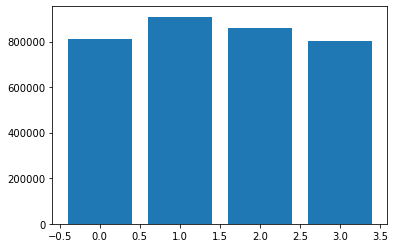

In [9]:
# Graph 1

# We are able to see the less correlation of the education against the income. 
x = updated_df['EDUCATION']
y = updated_df['INCOME']

plt.bar(x, y)
plt.show()

Gender vs Income


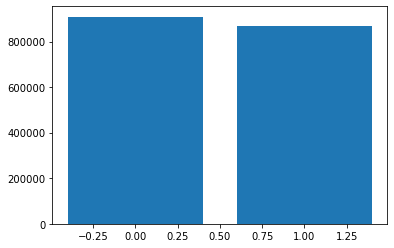

Gender vs Balance


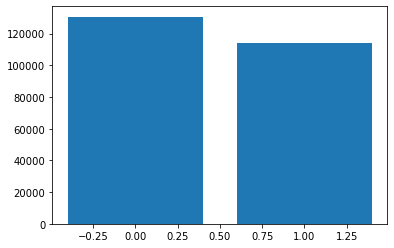

In [10]:
# Graph 2
#We are able to see that males are earning slightly more than the females
# this can be contributed the higher credit balance that the males have compared to females
print("Gender vs Income")
x = updated_df['GENDER']
y = updated_df['INCOME']

plt.bar(x, y)
plt.show()

print("Gender vs Balance")
x1 = updated_df['GENDER']
y1 = updated_df['BALANCE']
plt.bar(x1, y1)
plt.show()

<AxesSubplot:xlabel='INCOME', ylabel='Count'>

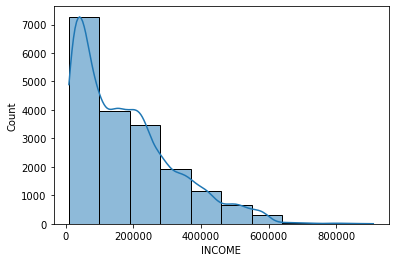

In [11]:
# Graph 3

#We are able to see the distribution of income.
#it follows a skewed distribution where most people are earning lesser 
#and a few with high income. 

sns.histplot(x=updated_df['INCOME'], bins=10, kde=True)

<AxesSubplot:>

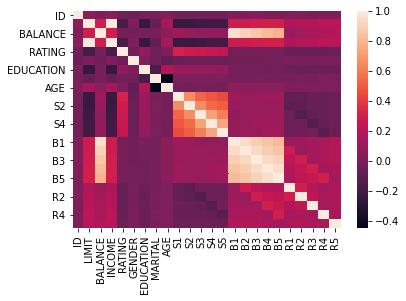

In [12]:
#Graph 4

#Heat map to see how the variables are correlated
#We are able to see that Billable and Repayment are correlated 
#We can also see that balance has higher correlation with B(n) variables
#multi-collinearity can happen and this needs further data processing

sns.heatmap(round(updated_df.corr(),2))

In [13]:
# Correlation Table - same as above, but with the values

corr=updated_df.corr()
corr.style.background_gradient(cmap='coolwarm')

,ID,LIMIT,BALANCE,INCOME,RATING,GENDER,EDUCATION,MARITAL,AGE,S1,S2,S3,S4,S5,B1,B2,B3,B4,B5,R1,R2,R3,R4,R5
ID,1.000000,0.049063,0.019003,0.048531,-0.024278,-0.035279,0.002447,-0.013299,0.029935,-0.021201,-0.023804,-0.017637,-0.026325,-0.021380,0.016736,0.018464,0.028681,0.010527,0.009879,0.007582,0.031514,0.002395,0.007507,0.011777
LIMIT,0.049063,1.000000,0.288485,0.993748,-0.175735,0.024121,-0.243500,-0.069819,0.141455,-0.234167,-0.229551,-0.219803,-0.202906,-0.197563,0.279517,0.283576,0.293616,0.301605,0.297745,0.171929,0.203155,0.202476,0.222839,0.212144
BALANCE,0.019003,0.288485,1.000000,0.286374,-0.022131,-0.034653,-0.010320,-0.012893,0.057953,0.118526,0.089521,0.069315,0.076462,0.075242,0.950897,0.901666,0.861572,0.823910,0.794227,0.110030,0.134363,0.162088,0.156118,0.202809
INCOME,0.048531,0.993748,0.286374,1.000000,-0.173835,0.023453,-0.241636,-0.068695,0.140584,-0.231662,-0.228203,-0.218456,-0.200894,-0.196609,0.277415,0.281655,0.291658,0.299475,0.296167,0.169926,0.199459,0.200383,0.222437,0.210783
RATING,-0.024278,-0.175735,-0.022131,-0.173835,1.000000,-0.044501,0.078770,-0.030343,0.019270,0.323348,0.281153,0.268900,0.257861,0.243750,-0.015610,-0.014869,-0.012524,-0.008388,-0.006939,-0.057908,-0.059666,-0.055011,-0.061712,-0.052710
GENDER,-0.035279,0.024121,-0.034653,0.023453,-0.044501,1.000000,0.009854,-0.026852,-0.091359,-0.056996,-0.052062,-0.052405,-0.048225,-0.048342,-0.033653,-0.028898,-0.026686,-0.022168,-0.020314,-0.000957,-0.010549,-0.005327,0.004180,-0.002095
EDUCATION,0.002447,-0.243500,-0.010320,-0.241636,0.078770,0.009854,1.000000,-0.172736,0.178383,0.114915,0.112060,0.108889,0.090865,0.082363,-0.011046,-0.012742,-0.020899,-0.025256,-0.019172,-0.037777,-0.061709,-0.047165,-0.053973,-0.050455
MARITAL,-0.013299,-0.069819,-0.012893,-0.068695,-0.030343,-0.026852,-0.172736,1.000000,-0.452027,-0.001027,0.005333,-0.001962,0.004785,0.006938,-0.008699,-0.009758,-0.008877,-0.009631,-0.005307,-0.009188,-0.002589,-0.012666,0.009344,-0.002890
AGE,0.029935,0.141455,0.057953,0.140584,0.019270,-0.091359,0.178383,-0.452027,1.000000,-0.015259,-0.017290,-0.014744,-0.019061,-0.023450,0.057463,0.057925,0.058298,0.055332,0.050637,0.018312,0.024212,0.013682,0.018106,0.017487
S1,-0.021201,-0.234167,0.118526,-0.231662,0.323348,-0.056996,0.114915,-0.001027,-0.015259,1.000000,0.664087,0.532660,0.494032,0.452284,0.116230,0.111185,0.108950,0.115232,0.118211,-0.075279,-0.084915,-0.052764,-0.058825,-0.048808


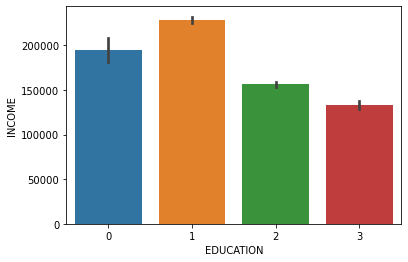

In [14]:
#Graph 5

#We are able to see how education has an effect on the income 
#this shows that postgraudate generally earn the most while 
#high school education earn the least

sns.barplot(x="EDUCATION", y="INCOME", data=updated_df);



# Question 4

In [15]:
#As stated in visualisation portion the risk of multi-collinearity can happen 
# As there are indpendent variables with high correlation (more than 80%)
#Hence we will be dropping B2-B5 as they have high correlation between each other
#we also dropped income as it is highly correlated with limit

# we also dropped these columns: education, gender, marital -> explain from bank perspective

X = updated_df[['LIMIT', 'BALANCE', 'RATING', 'AGE', 'S1', 'S2', 'S3', 'S4', 'S5', 'R1', 'R2', 'R3', 'R4', 'R5']]
y = updated_df['B1']


In [16]:
corr=X.corr()
corr.style.background_gradient(cmap='coolwarm')

,LIMIT,BALANCE,RATING,AGE,S1,S2,S3,S4,S5,R1,R2,R3,R4,R5
LIMIT,1.000000,0.288485,-0.175735,0.141455,-0.234167,-0.229551,-0.219803,-0.202906,-0.197563,0.171929,0.203155,0.202476,0.222839,0.212144
BALANCE,0.288485,1.000000,-0.022131,0.057953,0.118526,0.089521,0.069315,0.076462,0.075242,0.110030,0.134363,0.162088,0.156118,0.202809
RATING,-0.175735,-0.022131,1.000000,0.019270,0.323348,0.281153,0.268900,0.257861,0.243750,-0.057908,-0.059666,-0.055011,-0.061712,-0.052710
AGE,0.141455,0.057953,0.019270,1.000000,-0.015259,-0.017290,-0.014744,-0.019061,-0.023450,0.018312,0.024212,0.013682,0.018106,0.017487
S1,-0.234167,0.118526,0.323348,-0.015259,1.000000,0.664087,0.532660,0.494032,0.452284,-0.075279,-0.084915,-0.052764,-0.058825,-0.048808
S2,-0.229551,0.089521,0.281153,-0.017290,0.664087,1.000000,0.658108,0.545474,0.508499,-0.113710,-0.089550,-0.061228,-0.060788,-0.052810
S3,-0.219803,0.069315,0.268900,-0.014744,0.532660,0.658108,1.000000,0.725930,0.608779,-0.041553,-0.137693,-0.073048,-0.062302,-0.050613
S4,-0.202906,0.076462,0.257861,-0.019061,0.494032,0.545474,0.725930,1.000000,0.738037,-0.035461,-0.041512,-0.125972,-0.068198,-0.046711
S5,-0.197563,0.075242,0.243750,-0.023450,0.452284,0.508499,0.608779,0.738037,1.000000,-0.041255,-0.040479,-0.029493,-0.121723,-0.056339
R1,0.171929,0.110030,-0.057908,0.018312,-0.075279,-0.113710,-0.041553,-0.035461,-0.041255,1.000000,0.290049,0.198064,0.141841,0.160190


In [17]:
# Split the data into training/testing sets
# Use the last 20 rows as test data 
# Training set is use to train the model, test set is use to validate model's accuracy

X_train = X[:-20] 
X_test = X[-20:]
 
# Split the targets into training/testing sets
y_train = y[:-20] 
y_test = y[-20:]

In [18]:
# To train the data with training set

model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [19]:
#R**2 Result for Training Data

r_sq = model.score(X_train, y_train)
print(f"coefficient of determination: {r_sq}")
#We are able to see that this model can explain 90% of variability of the model


#To retrieve the intercept:
print(f"The intercept of the model: {model.intercept_}")
#this means that if all variable are 0, the y is at 20564

#For retrieving the slope:
print(f"The co-efficient/slope of the model: {model.coef_}")
# this means that for each unit of change B1
# the 14 variables used to predict will have to shift accordingly
# the change in dependent variable varies at {coef}%

coefficient of determination: 0.905753111552684
The intercept of the model: 715.6207245581973
The co-efficient/slope of the model: [ 7.83864120e-03  5.22387385e+00  2.17271440e+02  9.12993479e+00
 -1.96778682e+03  3.18125601e+03  2.83502964e+01  3.74566543e+02
  5.86234014e+02  4.70817749e-02 -1.47791479e-02 -4.47811414e-02
 -1.25126607e-02 -2.46970158e-02]


In [20]:
# using the trained model to predict B1
y_pred = model.predict(X_test)

In [21]:
#result: predicted vs actual
# predicted values: generated by the model
# actual: the last 20 rows of the data - used to validate the accuracy
df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
df

,Actual,Predicted
18749,49123,41587.397255
18750,36772,39381.228909
18751,9112,9017.189707
18752,2872,2545.453116
18753,923,2471.815940
18754,0,2870.792657
18755,0,7854.341088
18756,14077,21716.859590
18757,252913,258402.878214
18758,9009,3714.065910


In [22]:
#The model is able to explain 93% of the data variability 
# this is safe to assume that model is doing a good job in prediction 
print("Coefficient of determination: %.2f" % r2_score(y_test, y_pred))

Coefficient of determination: 0.93


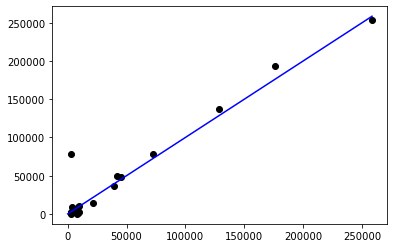

In [23]:
# # Plot outputs 
# Predicted vs Actual 
# We can see that the model is doing very well in terms of predicting
#As there is a very strong correlation between pred and test

plt.scatter(y_pred, y_test, color="black")
p1 = max(max(y_pred), max(y_test))
p2 = min(min(y_pred), min(y_test))
plt.plot([p1, p2], [p1, p2], 'b-')

plt.show()


<AxesSubplot:ylabel='B1'>

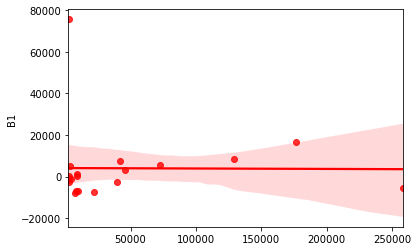

In [24]:
#For residual plot shows how much variability between the actual data and the predicted
# as residual appears to be near 0 and this also proves that prediction are correct

residual = y_test - y_pred 
sns.regplot(y = residual, x = y_pred, data = None, scatter = True, color = 'red')